In [1]:
"""
Created on Fri Dec 27 17:18:10 2019
Author: Brian Hogan, BBE, 718.lab3 w TensorFlow MNIST image prediction

Associated Research Websites work was assisted with
https://github.com/zalandoresearch/fashion-mnist/blob/master/README.md
https://www.tensorflow.org/tutorials/keras/classification

#Labels
# 0-T-shirt/top; 1-Trouser; 2-Pullover; 3-Dress; 4-Coat; 5-Sandal;6-Shirt
#7-Sneaker; 8-Bag; 9-Ankle boot

#Machine Learning
# Convolutional neural network
# Random Forest
"""
"""Author: Brian Hogan, BBE, 718.lab3 w TensorFlow MNIST image prediction"""

'Author: Brian Hogan, BBE, 718.lab3 w TensorFlow MNIST image prediction'

In [2]:
import tensorflow as tf   #print(tf.__version__)
#print(tf.__version__)
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.base import BaseEstimator
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
import os
print("done")

done


In [ ]:
#====> Obtain Original
#==> NOT USING AS DATA IN tf.keras
"""Didn't use as had trouble unpacking Numpy array"""
dirname = os.path.join('datasets', 'fashion-mnist')
base = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/'
files = ['train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz','t10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz']
paths = []
    
def load_data():
    dirname = os.path.join('datasets', 'fashion-mnist')
    base = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/'
    files = ['train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz', \
             't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz']
    paths = []
    for fname in files:
        paths.append(get_file(fname, origin=base + fname, cache_subdir=dirname))
        with gzip.open(paths[0], 'rb') as lbpath:
            y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)
        with gzip.open(paths[1], 'rb') as imgpath:
            x_train = np.frombuffer(imgpath.read(), np.uint8, offset=16).\
                                    reshape(len(y_train), 28, 28)
        with gzip.open(paths[2], 'rb') as lbpath:
            y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)
        with gzip.open(paths[3], 'rb') as imgpath:
            x_test = np.frombuffer(imgpath.read(), np.uint8, offset=16).\
                            reshape(len(y_test), 28, 28)
    return (x_train, y_train), (x_test, y_test)
load_data() 
data=tf.keras.datasets.fashion_mnist.load_data() 
#----Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).
x_train = pd.DataFrame(data[0]) #(x_train, y_train)
y_train = pd.DataFrame(data[1]) #(x_test, y_test)
x_train
"""NOT USING"""

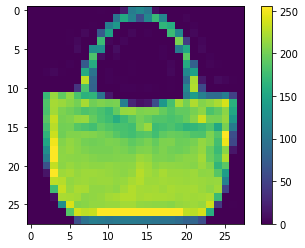

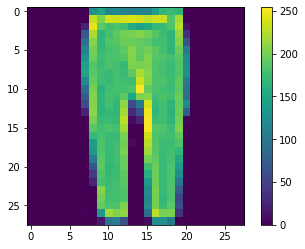

In [3]:
# OBTAIN  -- USING THIS WITH BUILT IN DATA SET (keras)
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images.shape  #(60000, 28, 28)
test_images.shape  #(10000, 28, 28)

class_names = ['t-shirt', 'pants', 'Pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'boot']

#check out some images
plt.figure()
plt.imshow(train_images[100])  #pocketbook
plt.colorbar()
plt.grid(False)
plt.show()
#pants
plt.figure()
plt.imshow(train_images[98])   #pants
plt.colorbar()
plt.grid(False)
plt.show()

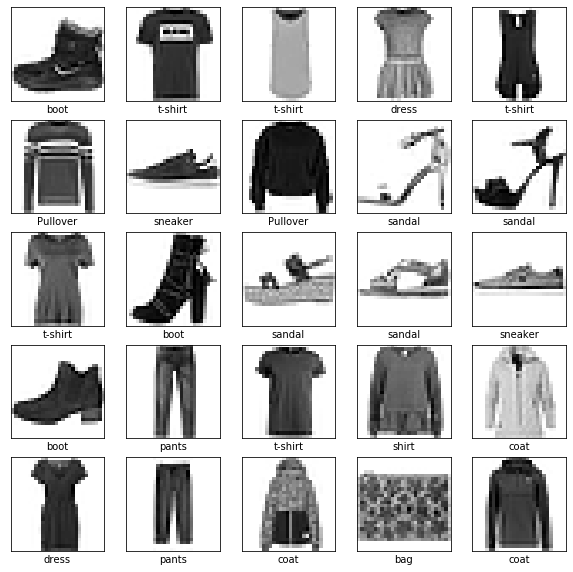

In [4]:
#Scrub
#pixwels in range of 0 - 255 used to build the shapes
#need to scale when working with data in tensorflow
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
#MODEL - Baseline Convolutation Neural Network
#keras has a tf.keras.layers.Dense with parameters to adjust features
#from keras import optimizers

#baseline = using default optimizer settings
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
    
#sgd = optimizers.SGD(lr=0.01, clipvalue=0.5)
#keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #shape being evaluated
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)])  #10 resulting layers
    
#adam original
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#RMS
model.compile(keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#AdaDelta
model.compile(keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#fit the model
model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.5123 - accuracy: 0.8189
Epoch 2/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3779 - accuracy: 0.8628
Epoch 3/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3414 - accuracy: 0.8762
Epoch 4/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3180 - accuracy: 0.8842
Epoch 5/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3000 - accuracy: 0.8909
Epoch 6/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2876 - accuracy: 0.8953
Epoch 7/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2764 - accuracy: 0.8988
Epoch 8/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2670 - accuracy: 0.9025
Epoch 9/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2586 - accuracy: 0.9058
Epoch

In [3]:
""" SUPPORT VECTOR MACHINE"""

' SUPPORT VECTOR MACHINE'

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

##adam original
#model.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])
##RMS
#model.compile(keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])
##AdaDelta
#model.compile(keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95),
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])

In [2]:
""" ==> Model train and test
SVM Assistance: https://deepstat.tistory.com/38   """

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

"C:\\Users\\17574\\Desktop\\ist718+Big+Data\\Lab3\\Labeled IMAGE Data\\Labeled IMAGE Data fashion-mnist_train.csv"
test_images = pd.read_csv("C:\\Users\\17574\\Desktop\\ist718+Big+Data\\Lab3\\Labeled IMAGE Data\\Labeled IMAGE Data fashion-mnist_test.csv")
train_images = pd.read_csv("C:\\Users\\17574\\Desktop\\ist718+Big+Data\\Lab3\\Labeled IMAGE Data\\Labeled IMAGE Data fashion-mnist_train.csv")
test_images.shape
data_train_y = train_images.label
y_test = test_images.label
data_train_x = train_images.drop("label",axis=1)/256
x_test=test_images.drop("label",axis=1)/256

np.random.seed(0)
valid2_idx = np.random.choice(60000,10000,replace=False)
valid1_idx = np.random.choice(list(set(range(60000))-set(valid2_idx)),10000,replace=False)
train_idx = list(set(range(60000))-set(valid1_idx)-set(valid2_idx))
x_train = data_train_x.iloc[train_idx,:]
y_train = data_train_y.iloc[train_idx]
x_valid1 = data_train_x.iloc[valid1_idx,:]
y_valid1 = data_train_y.iloc[valid1_idx]
x_valid2=data_train_x.iloc[valid2_idx,:]
y_valid2 = data_train_y.iloc[valid2_idx]

SVM_model = SVC(C=1).fit(x_train,y_train)
confusion_matrix(SVM_model.predict(x_train),y_train)

C:\Users\17574\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[3407,   17,   53,  131,    7,    1,  793,    0,    4,    1],
       [   7, 3798,    4,   19,    2,    0,    3,    0,    2,    1],
       [  56,   37, 3061,   40,  307,    0,  451,    0,   26,    0],
       [ 239,  122,   37, 3521,  167,    1,  143,    0,   28,    1],
       [  11,    7,  544,  113, 3212,    0,  377,    0,   13,    0],
       [   3,    0,    2,    0,    1, 3613,    0,  167,   19,   65],
       [ 234,    5,  331,   90,  303,    0, 2179,    0,   58,    0],
       [   0,    0,    0,    0,    0,  229,    0, 3734,   14,  170],
       [  36,    4,   24,   15,   17,   11,   58,    6, 3781,    1],
       [   1,    0,    0,    0,    0,   77,    1,  196,    1, 3790]],
      dtype=int64)